# HW8: Phylogenetic Trees 🌲

_"I wonder about the trees_" - Robert Frost

Biological sequence data can be used to provide insights into the evolutionary histories of organisms ranging from bacteria to humans. This week, you'll explore and implement an algorithm for inferring phylogenetic trees from sequence data. Specifically, you'll implement the UPGMA algorithm described in class and then apply it to a number of different datasets.

### Terminology and the Big Idea

First, a word on terminology.
We'll use the word **taxon** (the plural is **taxa**) rather than "species". A taxon can be a species but it can also be a larger group like a genus or a more specific group like a specific variant of a species.

We'll use the terms **tree** and **clade** interchangeably in this notebook. A tree (or clade) can be a single taxon or a group of related taxa. Our goal is to start with a list of clades comprising individual taxa and cluster them into a single tree that contains all of the given taxa.

Recall from class that we'll be representing trees using Newick format. In this format, a tree is a tuple of the form $(A, B)$ where $A$ and $B$ are either leaves or trees themselves!

For example, imagine that the original list of taxa (which we'll call our clade list) is
`["dog", "wolf", "chimp", "gorilla"]`, comprising four taxa. In the first iteration of our algorithm, we might merge `"dog"` and `"wolf"` into a clade `("dog", "wolf")`. We remove `"dog"` and `"wolf"` from the list of clades and add the new merged clade, so that the new clade list becomes
`[("dog", "wolf"), "chimp", "gorilla"]`. We repeat this process until, eventually, we have one tree in that list, for example it might be
`[(("dog", "wolf"), ("chimp", "gorilla"))]`. Our original list of four clades (individual taxa) has been clustered into a list of one clade:
`(("dog", "wolf"), ("chimp", "gorilla"))`. Notice that this is a tree of the form $(A, B)$. In this case $A$ is `("dog", "wolf")` and $B$ is ("chimp", "gorilla").
 We now return that one clade `(("dog", "wolf"), ("chimp", "gorilla"))` - which is the only element remaining the clade list - and that's our tree!





### Getting started

First, you'll need to install the Biopython package in this notebook, which we used early on in the semester. This package is full of powerful bioinformatic tools. We'll primarily be using a subpackage called Phylo for drawing phylogenetic trees.

**Note:** If you step away from your notebook for a while, then you will probably need to re-run this line.

In [2]:
!pip3 install Biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.9 MB/s eta 0:00:00


### Representing and Drawing trees




**Part 1**

_This part comprises two lines of code._

The code cell below demonstrates two examples of trees in Newick format. Try it out! Then, after you've tried it, add a `tree2` to that code cell, and use `Phylo.draw` to draw it, so that it looks like the tree shown below. It has six leaves "A", "B", "C", "D", "E", "F".
<br> <img src="https://www.cs.hmc.edu/twiki/pub/CS5Fall2022/PicobotProgrammingGold/tree_to_build.png" height="200px"> <br>

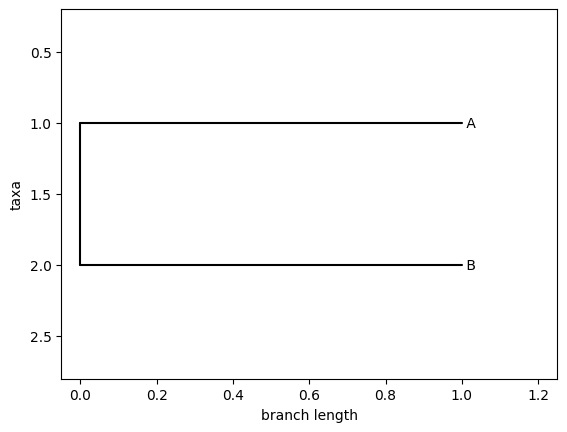

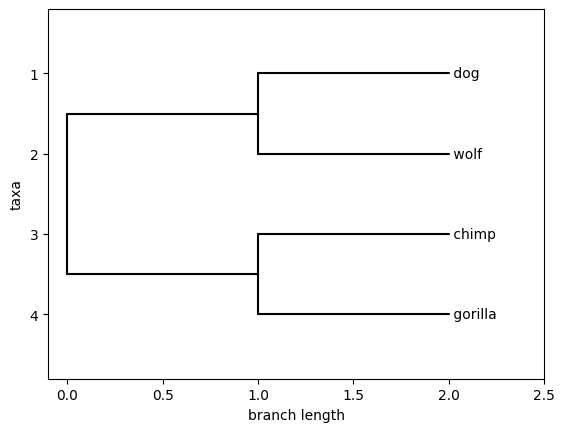

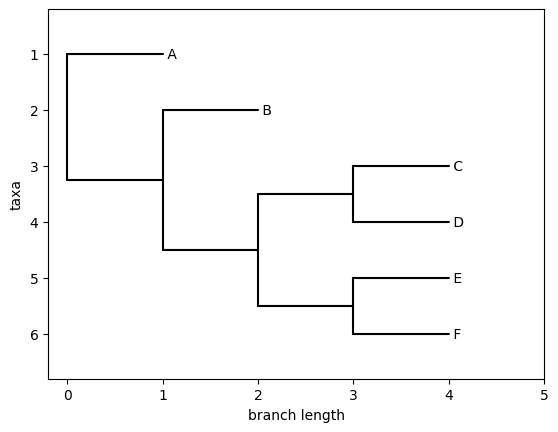

In [3]:
from Bio import Phylo
import io

tree0 = ("A", "B")
Phylo.draw(Phylo.read(io.StringIO(str(tree0)), "newick"))

tree1 = (("dog", "wolf"), ("chimp", "gorilla"))
Phylo.draw(Phylo.read(io.StringIO(str(tree1)), "newick"))

# Define tree2 here to match the picture above...
tree2 = ("A",("B",(("C","D"),("E","F"))))
Phylo.draw(Phylo.read(io.StringIO(str(tree2)), "newick"))
# ...and then uncomment the line below to draw it!
# Phylo.draw(Phylo.read(io.StringIO(str(tree2)), "newick"))

## Leaves

Trees have leaves! The function below counts the leaves (often referred to as "tips") in a tree. This will be very useful not only if you are given a large tree and you want to find out with how many leaves you are dealing with, but also when you update your distance dictionary. (That was cumbersome to do by hand in class, but will be much easier for your program to do!)


This leaf-counting function uses a programming technique called _recursion_ - that is, it's a function that calls _itself_ for help.

In general, a tree is made of two smaller trees. The total number of leaves in a tree is the sum of the number of leaves in those two smaller trees. To count the total number of leaves in a tree, this function calls _itself_ for help to count the number of leaves in the first smaller tree, then the second smaller tree, and then adds those two numbers up to get the total number of leaves.

For, example, the tree "A" is a leaf (it's the smallest tree possible), so `leaves("A")` returns 1. The tree ("A", "B") has two leaves ("A" and "B") so `leaves(("A", "B"))` returns 2. The tree `tree2` that you constructed in Part 1 has 6 leaves.



**Part 2**

Copy that tree into the code cell below and check to see that it has 6 leaves.



In [11]:
def leaves(tree):
  ''' Takes a tree in newick format as input and returns the number of leaves
      in that tree. '''
  if type(tree) == str:
    return 1
  else:
    return leaves(tree[0]) + leaves(tree[1])


print(leaves(tree = "A")) # Should be 1
print(leaves(tree = ("A", "B"))) # Should be 2

# Paste your tree2 tree from above to here...
tree2 = ("A",("B",(("C","D"),("E","F"))))

# ...and uncomment the line below to see that your tree has 6 leaves
print(leaves(tree2))

1
2
6


A few things to note. First, the contract for this function uses a format called **docstring**. It goes immediately after the **def** line and it starts and ends with three quotation marks. Note that you can use either single or double quotation marks, so long as you are consistent within a given docstring. This is the "official" way to make contracts in Python and we'll now start using docstrings for our contracts - and you should too!



### Removing an element from a list

We'll need to remove things from a list (e.g., remove a taxon from a list of taxa). Here's how this works. Try it:

In [12]:
L = ["cat", "dog", "mouse"]
print("L is", L)
L.remove("mouse") # This will remove "mouse" from the list L
print("Now, L is", L)

L is ['cat', 'dog', 'mouse']
Now, L is ['cat', 'dog']


**Part 3**

_This part comprises about seven lines of code._

In this part, we'll practice generating random trees of taxa to develop comfort with tree representation.

Imagine that we have a list of taxa like
`["dog", "cat", "lemur", "pig"]`. We'll call this list `clades`. Our task is to write a function called `randomTree(clades)` that returns a random tree made of those clades.

Here's how it works:
   * While there's more than one item in `clades`:
       * Choose a random clade from `clades`.
       * Remove that clade from the `clades` list so that we don't pick the same clade again for this tree!
          * Reminder: **To remove an item `x` from a list `L`** use the syntax `L.remove(x)`.
       * Choose another random clade from `clades`.
       * Remove that item from `clades` as well!
       * Join those two clades into one new clade (by putting those two clades into a tuple) and put that tuple/clade back in the `clades` list.
   * When we've finally merged all the clades in `clades` down to one clade, then we've merged all of the given taxa that we started with into one tree. We then _return_ the tree. **But be careful** -- we return that one tree in the list of clades, **not** the list itself. (Hint: what is the index of the entry in a single item list?)

In [15]:
import random

def randomTree(clades):
  ''' Takes a list of clades (taxa) as input and constructs a random tree
      of those taxa and returns that tree. '''
  # Add your code for randomTree below!
  while len(clades) > 1:
    clade = random.choice(clades)
    clades.remove(clade)
    clade2 = random.choice(clades)
    clades.remove(clade2)
    clades.append((clade, clade2))
  return clades[0]




# Provided tests

random.seed(46)
testList = ["dog", "cat", "lemur", "pig"]
test1 = randomTree(clades = testList)
if type(test1) == list:
  print("Oops! You returned a LIST of clades: ", test1)
else:
  print(test1)

random.seed(47)
testList = ["dog", "cat", "lemur", "pig"]
test2 = randomTree(clades = testList)
if type(test2) == list:
  print("Oops! You returned a LIST of clades: ", test1)
else:
  print(test2)

random.seed(49)
testList = ["dog", "cat", "lemur", "pig"]
test3 = randomTree(clades = testList)
if type(test3) == list:
  print("Oops! You returned a LIST of clades: ", test1)
else:
  print(test3)

(('dog', 'lemur'), ('cat', 'pig'))
(('pig', ('lemur', 'dog')), 'cat')
(('pig', 'cat'), ('dog', 'lemur'))


For the tests above, your `randomTree` function should yield:
<code><pre>
(('dog', 'lemur'), ('cat', 'pig'))
(('pig', ('lemur', 'dog')), 'cat')
(('pig', 'cat'), ('dog', 'lemur'))
</pre></code>

## Printing All Pairs

Here is a function `printDistances` that shows how to print **all pairs** from a list.
+ Our example list is of six hominids (family: Hominidae)
+ Notice the first loop, using `clade1`
+ Inside it is a nested loop, using `clade2`
+ Notice the `not-equal !=` test!
+ This ensures we only print the pairs where the clades are _different_. We don't print when they're the same.
+ Plus, we access `distanceDict`, the dictionary of distances, to obtain the distance, naming it `dist`. We print `dist` as well.

Read over this code before you run it -- your next function will use a _very similar_ doubly-nested `for` loop!

In [17]:
homoList = ['Chimpanzee', 'Neanderthal', 'San'] # change to: homoList = ['Chimpanzee', 'Neanderthal', 'San']
homoDistances = {('San', 'Neanderthal'): 0.012138, ('Neanderthal', 'Neanderthal'): 0.0, ('Chimpanzee', 'Finnish'): 0.089579, ('Finnish', 'Kostenki'): 0.001312, ('Neanderthal', 'Kostenki'): 0.011186, ('Yoruba', 'Kostenki'): 0.002187, ('Yoruba', 'Finnish'): 0.00225, ('Yoruba', 'San'): 0.005386, ('Kostenki', 'Finnish'): 0.001312, ('Chimpanzee', 'Neanderthal'): 0.088209, ('Yoruba', 'Chimpanzee'): 0.089942, ('Finnish', 'Neanderthal'): 0.011503, ('Finnish', 'Finnish'): 0.0, ('Kostenki', 'Neanderthal'): 0.011186, ('Kostenki', 'Chimpanzee'): 0.089433, ('Kostenki', 'Kostenki'): 0.0, ('San', 'San'): 0.0, ('Neanderthal', 'San'): 0.012138, ('Chimpanzee', 'Kostenki'): 0.089433, ('Finnish', 'Chimpanzee'): 0.089579, ('Finnish', 'Yoruba'): 0.00225, ('Neanderthal', 'Yoruba'): 0.010871, ('Neanderthal', 'Chimpanzee'): 0.088209, ('Yoruba', 'Yoruba'): 0.0, ('San', 'Chimpanzee'): 0.090525, ('San', 'Kostenki'): 0.005323, ('Kostenki', 'Yoruba'): 0.002187, ('Finnish', 'San'): 0.00526, ('Chimpanzee', 'Yoruba'): 0.089942, ('Chimpanzee', 'Chimpanzee'): 0.0, ('Yoruba', 'Neanderthal'): 0.010871, ('Kostenki', 'San'): 0.005323, ('Neanderthal', 'Finnish'): 0.011503, ('San', 'Finnish'): 0.00526, ('San', 'Yoruba'): 0.005386, ('Chimpanzee', 'San'): 0.090525}

def printDistances(clades, distanceDict):
  ''' Takes as input a list of clades and a dictionary whose keys are pairs
      of clades and whose values are the non-negative distances between those
      clades. Prints out the distances between every pair of clades in the
      list. '''
  for clade1 in clades:
    for clade2 in clades:
      if clade1 != clade2:   # <-- NOTICE THIS!!! We only compute distance if clade1 != clade2
        dist = distanceDict[(clade1, clade2)]  # here, we use the dictionary to define dist
        print(clade1, clade2, dist)            # print the two clades and their dist
  return

printDistances(clades = homoList, distanceDict = homoDistances)

Chimpanzee Neanderthal 0.088209
Chimpanzee San 0.090525
Neanderthal Chimpanzee 0.088209
Neanderthal San 0.012138
San Chimpanzee 0.090525
San Neanderthal 0.012138


Next, **change** the list of hominids so that it is this: <code><pre> homoList = ['Chimpanzee', 'Neanderthal', 'San'] </pre></code>

Then, re-run the cell above.  

With this change, you will see there are far fewer pairs and distances than before.

There should now be six pairs: <code><pre>
Chimpanzee Neanderthal 0.088209
Chimpanzee San 0.090525
Neanderthal Chimpanzee 0.088209
Neanderthal San 0.012138
San Chimpanzee 0.090525
San Neanderthal 0.012138
</pre></code>

**Note:** Later on in this assignment, we'll learn a bit more about what data these distances are calculated from, but for now you can consider them to be _similar_ to the Hamming distances we discussed in class.

## Finding the _Closest_ Pair



Below is a list comprising ancient and modern humans (_Homo sapiens_), Neanderthal (_Homo neanderthalensis_), and chimpanzee (_Pan troglodytes_). There are six items in that list. Following our convention, we call this a _clade list_. (Remember, the term _clade_ is synonomous with _tree_ for our purposes.) Initially, those clades are just individual taxa. Over time, those taxa will be combined into groups of taxa - that is bigger _clades_/_trees_.

Following that list is a Python dictionary comprising the distances between every pair of those six clades. Note that the distance from a clade to itself is 0 and that each key $(A, B)$ has another key $(B, A)$. The distances are the same for those pairs. The reason for having both occurrences is so that we can query the dictionary for the distance between $A$ and $B$ without having to worry about the order: We can ask about $(A, B)$ or $(B, A)$.

<br>

**Part 4** (10 Points)

_This part comprises around 7-10 lines of code._

In the code cell below, add the code for the function `findClosestPair(clades, distancesDict)` that returns a tuple (A, B) of the two _different_ items in `clades` that have the smallest distance (breaking ties as you wish).

We've seen this kind of thing before. Notice that on line 9, we're starting with the first two clades in the list as the closest pair. We're putting those two clades in the variable `bestPairSoFar`. It's likely that we'll find a closer pair of clades, but this is a reasonable one to use as the "best (closest) pair we've seen so far." In line 10, we're putting the distance between those clades in the variable `bestDistSoFar`. Next, we'll use a pair of nested for loops (just like in the example above!) to explore every pair of clades (other than a clade and itself). For each such pair, we'll find their distance and, if it's smaller than the distance in `bestDistSoFar`, we'll update _both_ `bestDistSoFar` _and_ `bestPairSoFar`.

Below we've copied the same `printDistances(clades, distancesDict)` function from above. It prints all of the pairs of _different_ clades. You won't need to use `printDistances`, but it will be helpful as a guide to writing `findClosestPair`.

In [18]:
homoList = ['Chimpanzee', 'Neanderthal', 'San', 'Yoruba', 'Finnish', 'Kostenki']
homoDistances = {('San', 'Neanderthal'): 0.012138, ('Neanderthal', 'Neanderthal'): 0.0, ('Chimpanzee', 'Finnish'): 0.089579, ('Finnish', 'Kostenki'): 0.001312, ('Neanderthal', 'Kostenki'): 0.011186, ('Yoruba', 'Kostenki'): 0.002187, ('Yoruba', 'Finnish'): 0.00225, ('Yoruba', 'San'): 0.005386, ('Kostenki', 'Finnish'): 0.001312, ('Chimpanzee', 'Neanderthal'): 0.088209, ('Yoruba', 'Chimpanzee'): 0.089942, ('Finnish', 'Neanderthal'): 0.011503, ('Finnish', 'Finnish'): 0.0, ('Kostenki', 'Neanderthal'): 0.011186, ('Kostenki', 'Chimpanzee'): 0.089433, ('Kostenki', 'Kostenki'): 0.0, ('San', 'San'): 0.0, ('Neanderthal', 'San'): 0.012138, ('Chimpanzee', 'Kostenki'): 0.089433, ('Finnish', 'Chimpanzee'): 0.089579, ('Finnish', 'Yoruba'): 0.00225, ('Neanderthal', 'Yoruba'): 0.010871, ('Neanderthal', 'Chimpanzee'): 0.088209, ('Yoruba', 'Yoruba'): 0.0, ('San', 'Chimpanzee'): 0.090525, ('San', 'Kostenki'): 0.005323, ('Kostenki', 'Yoruba'): 0.002187, ('Finnish', 'San'): 0.00526, ('Chimpanzee', 'Yoruba'): 0.089942, ('Chimpanzee', 'Chimpanzee'): 0.0, ('Yoruba', 'Neanderthal'): 0.010871, ('Kostenki', 'San'): 0.005323, ('Neanderthal', 'Finnish'): 0.011503, ('San', 'Finnish'): 0.00526, ('San', 'Yoruba'): 0.005386, ('Chimpanzee', 'San'): 0.090525}

def findClosestPair(clades, distanceDict):
  ''' Takes as input a list of clades and a dictionary of distances
      whose keys are pairs of clades. For each key - a pair of clades of the
      form (A, B) - the value is the distance between clade A and clade B.
      Returns the pair (a tuple) of clades that have the smallest distance'''
  bestPairSoFar = (clades[0], clades[1])
  bestDistSoFar = distanceDict[bestPairSoFar]
  # Add your code for findClosestPair below!
  for clade1 in clades:
    for clade2 in clades:
      if clade1 != clade2:   # <-- NOTICE THIS!!! We only compute distance if clade1 != clade2
        dist = distanceDict[(clade1, clade2)]
        if dist < bestDistSoFar:
          bestPairSoFar = (clade1,clade2)
          bestDistSoFar = dist

  return bestPairSoFar

print("Closest pair: ", findClosestPair(clades = homoList, distanceDict = homoDistances))
# The closest pair in this test should be Finnish and Kostenki

#THIS MAY BE USEFUL TO USE AS A GUIDE FOR THE findClosestPair FUNCTION
#def printDistances(clades, distanceDict):
#  ''' Takes as input a list of clades and a dictionary whose keys are pairs
#      of clades and whose values are the non-negative distances between those
#      clades. Prints out the distances between every pair of clades in the
#      list. '''
#  for clade1 in clades:
#    for clade2 in clades:
#      if clade1 != clade2:   # <-- NOTICE THIS!!! We only compute distance if clade1 != clade2
#        dist = distanceDict[(clade1, clade2)]  # here, we use the dictionary to define dist
#        # print(clade1, clade2, dist)            # optional: print the two clades and their dist
#  return

Closest pair:  ('Finnish', 'Kostenki')


## Updating the Distance Dictionary






Recall that the UPGMA algorithm repeatedly chooses two subtrees (aka "clades") and merges them into one.

**Concrete Example**

Let's imagine that in our first step of the algorithm, our clades are `["A", "B", "C", "D"]`. After using `findClosestPair`, suppose that we discover that `"A"` and `"B"` are the closest pair in that list of clades. We now remove `"A"` and `"B"` from that list. The clades list becomes `["C", "D"]`. Our closest pair is the new clade `("A", "B")` but we don't add it to the list of clades quite yet.

Now, we need to compute the distances between the new clade `("A", "B")` and the other clades that remain in that list and update our distance dictionary with those distances. That's the job of the function
`updateDist(clades, distanceDict, newClade)`
that you'll be writing here. That function takes as input the current list of clades (the list `["C", "D"]` in our example), the distance dictionary, and the new clade (which is `("A", "B")` in this example).

We'll loop over each clade in the list of clades `["C", "D"]` and compute the distance between each of those clades and our new clade `("A", "B")`.

The distance between `("A", "B")` and `"C"` is computed as a weighted average of the distance between `"A"` and `"C"` and the distance between `"B"` and `"C"`. There are two leaves here and `"A"` has one leaf and `"B"` has one leaf, so the weighted average is

 $\frac{1}{2}$ `distance[("A", "C")]` + $\frac{1}{2}$`distance[("B", "C")]`.

 We take a similar approach to calculate the distance between `("A", "B")` and `"D"`.

**Example with Larger Clades**

Now imagine that we merged two clades `X` and `Y`, where `X` has 10 leaves and `Y` has 5 leaves. There are 15 leaves total; `X` has 10 of them, and `Y` has 5 of them. We'd like to compute the distance between `(X, Y)` and some clade `Z` (which itself may have many leaves, but these won't matter).
(BTW, we could have merged the two clades as `(Y, X)` rather than `(X, Y)`. It doesn't matter which way we do it.)

In this case, the distance between `(X, Y)` and `Z` is

$\frac{10}{15}$ \* `distanceDict[(X, Z)]` + $\frac{5}{15}$ \* `distanceDict[(Y, Z)]`

or, equivalently, factoring out the $\frac{1}{15}$,

$\frac{1}{15}$ (10 \* `distanceDict[(X, Z)]` + 5 \* `distanceDict[(Y, Z)]`).

**Remember that 5 and 10 are just used as examples here!**

For the sake of example, let's imagine that this distance is computed and it turns out to be `46`. Then, we add the entry `distanceDict[((X, Y), Z)] = 46`. <font color="LimeGreen">**We also add**</font> the entries `distanceDict[(Z, (X, Y))] = 46`because we want to be able to look up the distance either way.

**A few notes**:
  * You might be tempted to also add
 `distanceDict[((Y, X), Z)] = 46` and `distanceDict[(Z, (Y, X))] = 46`, but that's not necessary. You might wish to stop and think about why - there's no way we'd look for those entries in the `distanceDict` in the future.)
  * When we update the distance dictionary, we don't remove any of the old clades from it; we only add the distance between the new clade and the other clades. There's no need to remove old distances from the dictionary. We'll never look them up or use them in the future.



**Part 5** (10 Points)

_This part comprises around 10 lines of code._

**First, write the docstring (remember from above, that's like a contract but it goes write after the first line of the function and we use triple quotes to start and end it) for the `updateDist` function.** Then, write the code.

This function takes as input the list of `clades`, the `distanceDict` dictionary that contains the distances between pairs of clades, and the new clade. It updates the distance dictionary with the distances between the new clade and **all clades** in the `clades` list. Finally, it returns that updated distance dictionary.

In [4]:
def leaves(tree):
  ''' Takes a tree in newick format as input and returns the number of leaves
      in that tree. '''
  if type(tree) == str:
    return 1
  else:
    return leaves(tree[0]) + leaves(tree[1])

# Paste your findClosestPair function here
# Make sure to include everything from 'def' to the final 'return' in the function
def findClosestPair(clades, distanceDict):
  ''' Takes as input a list of clades and a dictionary of distances
      whose keys are pairs of clades. For each key - a pair of clades of the
      form (A, B) - the value is the distance between clade A and clade B.
      Returns the pair (a tuple) of clades that have the smallest distance'''
  bestPairSoFar = (clades[0], clades[1])
  bestDistSoFar = distanceDict[bestPairSoFar]
  # Add your code for findClosestPair below!
  for clade1 in clades:
    for clade2 in clades:
      if clade1 != clade2:   # <-- NOTICE THIS!!! We only compute distance if clade1 != clade2
        dist = distanceDict[(clade1, clade2)]
        if dist < bestDistSoFar:
          bestPairSoFar = (clade1,clade2)
          bestDistSoFar = dist
    return bestPairSoFar



def updateDist(clades, distanceDict, newClade):
  ''' Takes in list clades, dictionary distanceDict, and a new clade newClade and updates the dictionary to include the distances between the new clade and all clades in clade.'''
  X = newClade[0]  # Read "Example with Variables X, Y, and Z" above!!
  Y = newClade[1]
  # Add your code for updateDist below!
  # Note: It will be very useful for you to have the number of leaves in X
  # and Y. (You have a helper function that will compute that!)
  xLeaves = leaves(X)
  yLeaves = leaves(Y)
  for clade in clades:
    distX = distanceDict[(X, clade)]
    distY = distanceDict[(Y, clade)]
    distance = (xLeaves * distX + yLeaves * distY)/ (xLeaves + yLeaves)
    distanceDict[(newClade, clade)] = distance
    distanceDict[(clade, newClade)] = distance





  return distanceDict

# here is a three-clade example with dog, cat, and mouse:
clades1 = ["dog", "cat", "mouse"]
distanceDict1 = { ("dog", "cat") : 1.46, ("cat", "dog") : 1.46,
                  ("dog", "mouse") : 1.98, ("mouse", "dog") : 1.98,
                  ("cat", "mouse") : 2.12, ("mouse", "cat") : 2.12}

pair = findClosestPair(clades = clades1, distanceDict = distanceDict1)
print("Closest pair found is: ", pair)  # Should be (dog, cat) or (cat, dog)

# This will remove dog and cat from the list of clades
print("Removing from clades: pair[0] = ", pair[0], " and pair[1] = ", pair[1])
clades1.remove(pair[0])
clades1.remove(pair[1])

print("New clades list after removal is: ", clades1)
newClade = pair  # The closest pair is our new clade!
newDistanceDict1 = updateDist(clades = clades1, distanceDict = distanceDict1, newClade = newClade)

print("Updated distance dictionary...")
print(newDistanceDict1)

Closest pair found is:  ('dog', 'cat')
Removing from clades: pair[0] =  dog  and pair[1] =  cat
New clades list after removal is:  ['mouse']
Updated distance dictionary...
{('dog', 'cat'): 1.46, ('cat', 'dog'): 1.46, ('dog', 'mouse'): 1.98, ('mouse', 'dog'): 1.98, ('cat', 'mouse'): 2.12, ('mouse', 'cat'): 2.12, (('dog', 'cat'), 'mouse'): 2.05, ('mouse', ('dog', 'cat')): 2.05}


The updated distance dictionary above should be
<font size="-1"><code><pre>
{('dog', 'cat'): 1.46, ('cat', 'dog'): 1.46, ('dog', 'mouse'): 1.98, ('mouse', 'dog'): 1.98, ('cat', 'mouse'): 2.12, ('mouse', 'cat'): 2.12, (('dog', 'cat'), 'mouse'): 2.05, ('mouse', ('dog', 'cat')): 2.05}
</pre></code></font>

## Putting it all together: _Phylogenetic Trees_



**Part 6** (10 Points)

_This part comprises around eight lines of code._

Now, you're ready to put everything together into one complete program!

Start by copying-and-pasting your `findClosestPair` and `updateDist` functions into the code cell below.
Then, write the last function, `generateTree(clades, distanceDict)` which takes a list of clades and a distance dictionary as input. It works as follows:

**While** there is more than one clade in the `clades` list...
   1. Call `findClosestPair` to get a pair of distinct clades whose distance is smallest. Recall that `findClosestePair` returns a tuple `(clade1, clade2)` where `clade1` and `clade2` are two clades that are the closest pair.
   2. Put the tuple that was returned from `findClosestPair` into a variable called `newClade`. Get the two clades out of that tuple and put them in variables called `clade1` and `clade2`. (We're just doing that so that we can remove them from the `clades` list in the next step.)
   3. Remove `clade1` and `clade2` from the `clades` list.  **Be sure to do that _before_ calling `updateDist` in the next step.** We saw how removal from a list works earlier. (If you don't recall, search for "remove" in this notebook.) 😀
   4. Call `updateDist` to update the distance dictionary. (Be sure to reassign it!)
   5. Add `newClade` to the list of `clades`.

When the while loop is done, the `clades` list will contain just one clade. This function should return that _one clade_.

The order in which those steps is performed is important. Pause for a moment and ask yourself what would go wrong, for example, if you moved step 5 before step 4.

When you finally have just one clade in the `clades` list, that clade is our phylogenetic tree! All of the little clades have now been merged into a single large one! The `generateTree` function now returns that tree -- or more specifically, that tuple that we can ultimately draw as a tree diagram.

Try it first for the three-clade list (dog, cat, and mouse). The result should look equivalent to this: <br>
<img src="https://www.cs.hmc.edu/twiki/pub/CS5Fall2022/PicobotProgrammingGold/three_clade_tree.png" height="200px">




('mouse', ('dog', 'cat'))


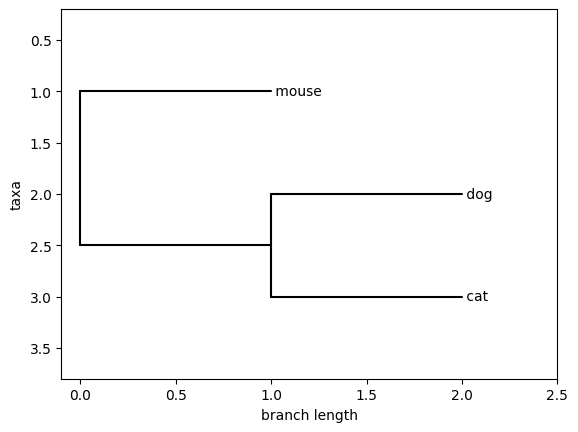

In [5]:
from Bio import Phylo
import io

# here is the three-clade example
clades1 = ["dog", "cat", "mouse"]
distanceDict1 = { ("dog", "cat") : 1.46, ("cat", "dog") : 1.46,
                  ("dog", "mouse") : 1.98, ("mouse", "dog") : 1.98,
                  ("cat", "mouse") : 2.12, ("mouse", "cat") : 2.12}

def leaves(tree):
  ''' Takes a tree in newick format as input and returns the number of leaves
      in that tree. '''
  if type(tree) == str:
    return 1
  else:
    return leaves(tree[0]) + leaves(tree[1])

# Paste your findClosestPair and updateDist functions here

def findClosestPair(clades, distanceDict):
  ''' Takes as input a list of clades and a dictionary of distances
      whose keys are pairs of clades. For each key - a pair of clades of the
      form (A, B) - the value is the distance between clade A and clade B.
      Returns the pair (a tuple) of clades that have the smallest distance'''
  bestPairSoFar = (clades[0], clades[1])
  bestDistSoFar = distanceDict[bestPairSoFar]
  # Add your code for findClosestPair below!
  for clade1 in clades:
    for clade2 in clades:
      if clade1 != clade2:   # <-- NOTICE THIS!!! We only compute distance if clade1 != clade2
        dist = distanceDict[(clade1, clade2)]
        if dist < bestDistSoFar:
          bestPairSoFar = (clade1,clade2)
          bestDistSoFar = dist

  return bestPairSoFar

def updateDist(clades, distanceDict, newClade):
  ''' Takes in list clades, dictionary distanceDict, and a new clade newClade and updates the dictionary to include the distances between the new clade and all clades in clade.'''
  X = newClade[0]  # Read "Example with Variables X, Y, and Z" above!!
  Y = newClade[1]
  # Add your code for updateDist below!
  # Note: It will be very useful for you to have the number of leaves in X
  # and Y. (You have a helper function that will compute that!)
  xLeaves = leaves(X)
  yLeaves = leaves(Y)
  for clade in clades:
    distX = distanceDict[(X, clade)]
    distY = distanceDict[(Y, clade)]
    distance = (xLeaves * distX + yLeaves * distY)/ (xLeaves + yLeaves)
    distanceDict[(newClade, clade)] = distance
    distanceDict[(clade, newClade)] = distance

def generateTree(clades, distanceDict):
  ''' Takes a list of clades and distance dictionary as input and returns
      the phylogenetic tree that results from applying the UPGMA algorithm. '''
  # Add your code for generateTree below!
  while len(clades) > 1:
    clade1, clade2 = findClosestPair(clades, distanceDict)
    newClade = (clade1, clade2)
    clades.remove(clade1)
    clades.remove(clade2)
    updateDist(clades, distanceDict, newClade)
    clades.append(newClade)

  return clades[0]


# This function is provided and runs your program and displays the resulting tree.
# No need to change this code:
def main():
  tree = generateTree(clades = clades1, distanceDict = distanceDict1)
  # tree = generateTree(neandList, neandDistances)
  print(tree)
  if type(tree) is list:
    print("Oops! Here's what got returned by generateTree: ", tree)
  else:
    Phylo.draw(Phylo.read(io.StringIO(str(tree)), "newick"))

main()

## From cats-and-dogs-and-mice to humans:

When everything above is written and running for cats-and-dogs-and-mice, try it with the data below for Neanderthals, chimps, and human groups.

We won't spoil the surprise by previewing the result, but if you get a "staircase" look, it's working!

No new code to write here:

('Chimpanzee', ('Neanderthal', ('San', ('Yoruba', ('Finnish', 'Kostenki')))))


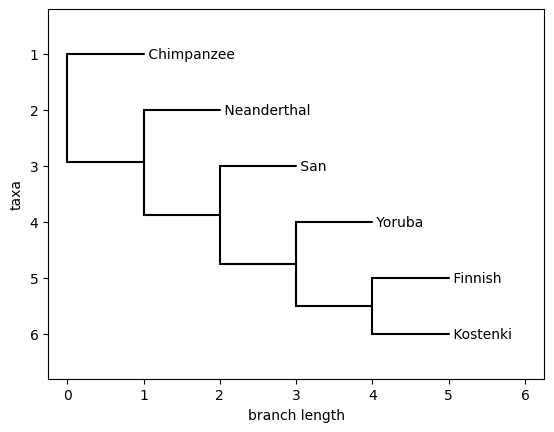

In [6]:
# Test list of clades provided for hominid species
neandList = ['Chimpanzee', 'Neanderthal', 'San', 'Yoruba', 'Finnish', 'Kostenki']

# Test dictance dictionary provided for hominid species
neandDistances = {('San', 'Neanderthal'): 0.012138, ('Neanderthal', 'Neanderthal'): 0.0, ('Chimpanzee', 'Finnish'): 0.089579, ('Finnish', 'Kostenki'): 0.001312, ('Neanderthal', 'Kostenki'): 0.011186, ('Yoruba', 'Kostenki'): 0.002187, ('Yoruba', 'Finnish'): 0.00225, ('Yoruba', 'San'): 0.005386, ('Kostenki', 'Finnish'): 0.001312, ('Chimpanzee', 'Neanderthal'): 0.088209, ('Yoruba', 'Chimpanzee'): 0.089942, ('Finnish', 'Neanderthal'): 0.011503, ('Finnish', 'Finnish'): 0.0, ('Kostenki', 'Neanderthal'): 0.011186, ('Kostenki', 'Chimpanzee'): 0.089433, ('Kostenki', 'Kostenki'): 0.0, ('San', 'San'): 0.0, ('Neanderthal', 'San'): 0.012138, ('Chimpanzee', 'Kostenki'): 0.089433, ('Finnish', 'Chimpanzee'): 0.089579, ('Finnish', 'Yoruba'): 0.00225, ('Neanderthal', 'Yoruba'): 0.010871, ('Neanderthal', 'Chimpanzee'): 0.088209, ('Yoruba', 'Yoruba'): 0.0, ('San', 'Chimpanzee'): 0.090525, ('San', 'Kostenki'): 0.005323, ('Kostenki', 'Yoruba'): 0.002187, ('Finnish', 'San'): 0.00526, ('Chimpanzee', 'Yoruba'): 0.089942, ('Chimpanzee', 'Chimpanzee'): 0.0, ('Yoruba', 'Neanderthal'): 0.010871, ('Kostenki', 'San'): 0.005323, ('Neanderthal', 'Finnish'): 0.011503, ('San', 'Finnish'): 0.00526, ('San', 'Yoruba'): 0.005386, ('Chimpanzee', 'San'): 0.090525}

# This function is provided. This time, try it for the hominid species:
def main():
  clades1 = neandList
  distanceDict1 = neandDistances
  # tree = generateTree(clades = clades1, distanceDict = distanceDict1)
  tree = generateTree(clades = neandList, distanceDict = neandDistances)
  print(tree)
  if type(tree) is list:
    print("Oops! Here's what got returned by generateTree: ", tree)
  else:
    Phylo.draw(Phylo.read(io.StringIO(str(tree)), "newick"))

# Run main:
main()

## Timed Trees

You're now inferring phylogenetic trees! But notice that the branch lengths of our trees are *all the same*. We have a **cladogram** at this point but we want a **chronogram**. Ideally, the branch lengths should reflect the _distances_ that we're computing in the distance dictionary - and those distances will, ultimately, be calibrated to time. Happily, this requires just one additional line of code...

**Part 7**

_This part is short and sweet!_

You're just adding one line so that your phylogenetic trees will include the timings available in the `distanceDict`.

* First, copy-and-paste your `findClosestPair`, `updateDist`, and `generateTree` functions into the code cell below.

* Second, in the `generateTree` function, add this line as the last line _inside_ its loop:

  ```cladeTimes[newClade] = distanceDict[(clade1, clade2)]/2.0```

  This line uses a dictionary called `cladeTimes` to record the time when `clade1` and `clade2` diverged. This concept was discussed in class. Be sure that you understand why we're doing this -- as well as what the results are "saying"!

Again, run this for our dog-cat-mouse example. Here is what your timed-tree should look like:

<img src="https://www.cs.hmc.edu/twiki/pub/CS5Fall2022/PicobotProgrammingGold/timed_tree.png" height="200px">

Notice that the dog/cat split was more than half of that evolutionary time span. (The dog and cat branches are more than half of that tree.)

In the next part, you'll run the same analysis for a hominid species dataset.

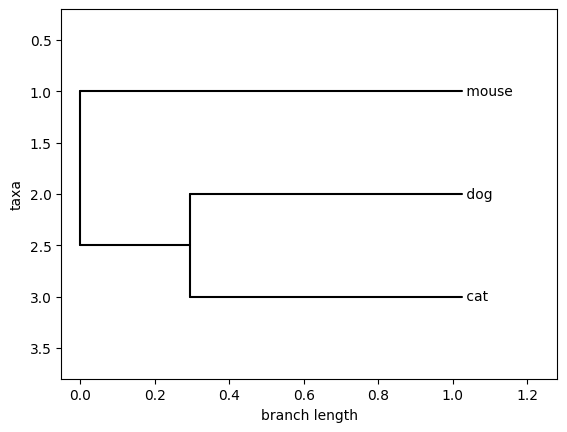

In [7]:
from Bio import Phylo
import io

cladeTimes = {}   # a global dictionary of timings for our tree

# Test list of clades...
neandList = ['Chimpanzee', 'Neanderthal', 'San', 'Yoruba', 'Finnish', 'Kostenki']

# Test dictance dictionary
neandDistances = {('San', 'Neanderthal'): 0.012138, ('Neanderthal', 'Neanderthal'): 0.0, ('Chimpanzee', 'Finnish'): 0.089579, ('Finnish', 'Kostenki'): 0.001312, ('Neanderthal', 'Kostenki'): 0.011186, ('Yoruba', 'Kostenki'): 0.002187, ('Yoruba', 'Finnish'): 0.00225, ('Yoruba', 'San'): 0.005386, ('Kostenki', 'Finnish'): 0.001312, ('Chimpanzee', 'Neanderthal'): 0.088209, ('Yoruba', 'Chimpanzee'): 0.089942, ('Finnish', 'Neanderthal'): 0.011503, ('Finnish', 'Finnish'): 0.0, ('Kostenki', 'Neanderthal'): 0.011186, ('Kostenki', 'Chimpanzee'): 0.089433, ('Kostenki', 'Kostenki'): 0.0, ('San', 'San'): 0.0, ('Neanderthal', 'San'): 0.012138, ('Chimpanzee', 'Kostenki'): 0.089433, ('Finnish', 'Chimpanzee'): 0.089579, ('Finnish', 'Yoruba'): 0.00225, ('Neanderthal', 'Yoruba'): 0.010871, ('Neanderthal', 'Chimpanzee'): 0.088209, ('Yoruba', 'Yoruba'): 0.0, ('San', 'Chimpanzee'): 0.090525, ('San', 'Kostenki'): 0.005323, ('Kostenki', 'Yoruba'): 0.002187, ('Finnish', 'San'): 0.00526, ('Chimpanzee', 'Yoruba'): 0.089942, ('Chimpanzee', 'Chimpanzee'): 0.0, ('Yoruba', 'Neanderthal'): 0.010871, ('Kostenki', 'San'): 0.005323, ('Neanderthal', 'Finnish'): 0.011503, ('San', 'Finnish'): 0.00526, ('San', 'Yoruba'): 0.005386, ('Chimpanzee', 'San'): 0.090525}

clades1 = ["dog", "cat", "mouse"]
distanceDict1 = { ("dog", "cat") : 1.46, ("cat", "dog") : 1.46,
                  ("dog", "mouse") : 1.98, ("mouse", "dog") : 1.98,
                  ("cat", "mouse") : 2.12, ("mouse", "cat") : 2.12}

def leaves(tree):
  ''' Takes a tree in newick format as input and returns the number of leaves
      in that tree. '''
  if type(tree) == str:
    return 1
  else:
    return leaves(tree[0]) + leaves(tree[1])

# Paste your findClosestPair, updateDist, and generateTree functions here
# but *REMEMBER* that you need to add one line to generateTree (see above!)

def findClosestPair(clades, distanceDict):
  ''' Takes as input a list of clades and a dictionary of distances
      whose keys are pairs of clades. For each key - a pair of clades of the
      form (A, B) - the value is the distance between clade A and clade B.
      Returns the pair (a tuple) of clades that have the smallest distance'''
  bestPairSoFar = (clades[0], clades[1])
  bestDistSoFar = distanceDict[bestPairSoFar]
  # Add your code for findClosestPair below!
  for clade1 in clades:
    for clade2 in clades:
      if clade1 != clade2:   # <-- NOTICE THIS!!! We only compute distance if clade1 != clade2
        dist = distanceDict[(clade1, clade2)]
        if dist < bestDistSoFar:
          bestPairSoFar = (clade1,clade2)
          bestDistSoFar = dist

  return bestPairSoFar

def updateDist(clades, distanceDict, newClade):
  ''' Takes in list clades, dictionary distanceDict, and a new clade newClade and updates the dictionary to include the distances between the new clade and all clades in clade.'''
  X = newClade[0]  # Read "Example with Variables X, Y, and Z" above!!
  Y = newClade[1]
  # Add your code for updateDist below!
  # Note: It will be very useful for you to have the number of leaves in X
  # and Y. (You have a helper function that will compute that!)
  xLeaves = leaves(X)
  yLeaves = leaves(Y)
  for clade in clades:
    distX = distanceDict[(X, clade)]
    distY = distanceDict[(Y, clade)]
    distance = (xLeaves * distX + yLeaves * distY)/ (xLeaves + yLeaves)
    distanceDict[(newClade, clade)] = distance
    distanceDict[(clade, newClade)] = distance

def generateTree(clades, distanceDict):
  ''' Takes a list of clades and distance dictionary as input and returns
      the phylogenetic tree that results from applying the UPGMA algorithm. '''
  # Add your code for generateTree below!
  while len(clades) > 1:
    clade1, clade2 = findClosestPair(clades, distanceDict)
    newClade = (clade1, clade2)
    clades.remove(clade1)
    clades.remove(clade2)
    updateDist(clades, distanceDict, newClade)
    clades.append(newClade)
    cladeTimes[newClade] = distanceDict[(clade1, clade2)]/2.0

  return clades[0]



# This makeTimedTree function is provided for creating a tree with timings
def makeTimedTree(tree):
  ''' This function takes a phylogenetic tree as input and uses the cladeTimes
      dictionary to reconstruct the branch lengths, returning a timed
      Newick tree. '''
  if type(tree) == str:
    return tree
  else:
    timeClade1, timeClade2, timeTree = 0,0,0  # start at all 0's
    clade1, clade2 = tree
    if tree in cladeTimes: timeTree = cladeTimes[tree]
    if clade1 in cladeTimes: timeClade1 = cladeTimes[clade1]
    if clade2 in cladeTimes: timeClade2 = cladeTimes[clade2]
    output = "(" + makeTimedTree(clade1) + ":" + str(timeTree-timeClade1) + "," \
                 + makeTimedTree(clade2) + ":" + str(timeTree-timeClade2) + ")"
    return output

# This function is provided and runs your program and displays the resulting tree:
def main():
  tree = generateTree(clades = clades1, distanceDict = distanceDict1)  # our cat-dog-mouse example
  if type(tree) is list:
    print("Oops! Here's what got returned by generateTree: ", tree)
  else:
    timedTree = makeTimedTree(tree)
    Phylo.draw(Phylo.read(io.StringIO(str(timedTree)), "newick"))

main()

**Part 8**

With your dog-cat-mouse example working, next run the cell below to find the _timed_ phylogenetic tree for our hominid species.

You'll see that it's much less _staircase-y_ !

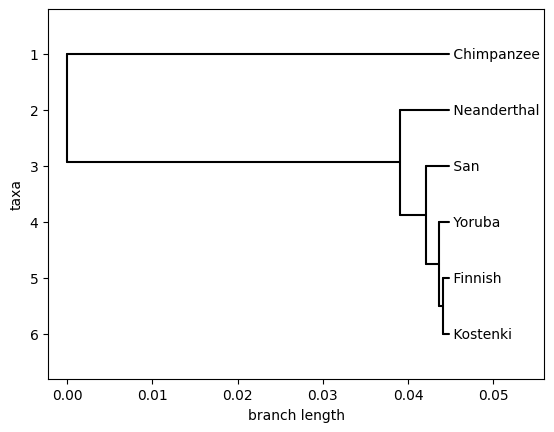

(Chimpanzee:0.0447688,(Neanderthal:0.00571225,(San:0.0026614999999999994,(Yoruba:0.00110925,(Finnish:0.000656,Kostenki:0.000656):0.00045325):0.0015522499999999994):0.003050750000000001):0.039056549999999995)


In [8]:
from Bio import Phylo
import io

cladeTimes = {}   # a global dictionary of timings for our tree

# Test list of hominid clades...
neandList = ['Chimpanzee', 'Neanderthal', 'San', 'Yoruba', 'Finnish', 'Kostenki']

# Test hominid dictance dictionary
neandDistances = {('San', 'Neanderthal'): 0.012138, ('Neanderthal', 'Neanderthal'): 0.0, ('Chimpanzee', 'Finnish'): 0.089579, ('Finnish', 'Kostenki'): 0.001312, ('Neanderthal', 'Kostenki'): 0.011186, ('Yoruba', 'Kostenki'): 0.002187, ('Yoruba', 'Finnish'): 0.00225, ('Yoruba', 'San'): 0.005386, ('Kostenki', 'Finnish'): 0.001312, ('Chimpanzee', 'Neanderthal'): 0.088209, ('Yoruba', 'Chimpanzee'): 0.089942, ('Finnish', 'Neanderthal'): 0.011503, ('Finnish', 'Finnish'): 0.0, ('Kostenki', 'Neanderthal'): 0.011186, ('Kostenki', 'Chimpanzee'): 0.089433, ('Kostenki', 'Kostenki'): 0.0, ('San', 'San'): 0.0, ('Neanderthal', 'San'): 0.012138, ('Chimpanzee', 'Kostenki'): 0.089433, ('Finnish', 'Chimpanzee'): 0.089579, ('Finnish', 'Yoruba'): 0.00225, ('Neanderthal', 'Yoruba'): 0.010871, ('Neanderthal', 'Chimpanzee'): 0.088209, ('Yoruba', 'Yoruba'): 0.0, ('San', 'Chimpanzee'): 0.090525, ('San', 'Kostenki'): 0.005323, ('Kostenki', 'Yoruba'): 0.002187, ('Finnish', 'San'): 0.00526, ('Chimpanzee', 'Yoruba'): 0.089942, ('Chimpanzee', 'Chimpanzee'): 0.0, ('Yoruba', 'Neanderthal'): 0.010871, ('Kostenki', 'San'): 0.005323, ('Neanderthal', 'Finnish'): 0.011503, ('San', 'Finnish'): 0.00526, ('San', 'Yoruba'): 0.005386, ('Chimpanzee', 'San'): 0.090525}

# This function is provided and runs your program and displays the resulting tree:
def main():
  clades1 = neandList
  distanceDict1 = neandDistances   # our hominid-species example

  tree = generateTree(clades = clades1, distanceDict = distanceDict1)
  if type(tree) is list:
    print("Oops! Here's what got returned by generateTree: ", tree)
  else:
    timedTree = makeTimedTree(tree)
    Phylo.draw(Phylo.read(io.StringIO(str(timedTree)), "newick"))
    print(timedTree)  # this line has been added to print out the branch lengths!

main()

The timed phylogenetic tree that you inferred above used mitochondrial DNA from living chimpanzees and from members of the genus _Homo_:
   * _Homo neanderthalensis_ (Neanderthals)
   * Four groups of _Homo sapiens_:
      * Kostenki people (ancient humans whose bones were discovered in Southern Russia)
      * San people (currently living in southern Africa)
      * Yoruba people (currently living in western Africa)
      * Finnish people (currently living in northern Europe)

One strange thing about the phylogenetic trees inferred by the UPGMA algorithm is that all of the "leaves" - that is Chimpanzees, Neanderthals, Kostenki people, etc. appear to be alive at the current time since all of the leftmost branches end at time at current time. Clearly, some of these groups have gone extinct, so some of the leftmost branches should end earlier. This algorithm doesn't account for that.

However, the algorithm is useful in determining the timing on branches in the tree. In particular, using fossil records and other techniques, scientists estimate that the most recent common ancestor of Neanderthals and _Homo sapiens_ lived <font color="DarkTurquoise">about 500,000 years ago</font>.

Since mitochondrial DNA (mtDNA) was used here and we assume that mtDNA mutates at a constant rate, we can use the "molecular clock" assumption that we discussed in class: branch length is proportional to time.


**Part 9**

Based on the molecular clock assumption **and** the branch lengths inferred by your program on the genus _Homo_ data, estimate the divergence time of chimpanzees from the genus _Homo_. That is, estimate when the last common ancestor of chimpanzees and modern humans lived **and** explain how you estimated that from the tree that your code generated. To help make this more straightforward, we've added a line of code above that outputs the branch lengths in the tree.

<font color="Red">**By the molecular clock assumption we can guess what the branch lengths by comparing the Neanderthal and Homo distance to the actual length in time, and applying the same ratio to Chimpanzee and Homo. We know that Neanderthal-Homo is about 0.006 which represents 500,000 years. Using this we can find the per-unit years is 500,000/0.006 or about 83,000,000 years. Then, we can multiply the Chimp-Homo length (about 0.048) to this, 83,000,000*0.048 to get 3,984,000 years. So in conclusion, the last common ancestor of chimpanzees and humans lived around 4 million years ago.**</font>



## Working with Sequence Data

In many cases we have to construct the dictionary of distances ourselves from sequence data. Those sequences might be sequences from the 16S gene in bacteria or from the COX1 gene in mitochondrial DNA of eukaryotic species. Moreover, those sequences may be DNA, RNA, or even amino acid sequences. In any case, the sequences have already been "aligned" so that they all have the same length.

We've provided you with aligned amino acid sequences (rather than DNA sequences) from five strains of bacteria. This file is in FASTA format -- a format used for biological sequence data.
Download this file and then upload it into your `SCI10 > Week9` folder on Google Drive. Please be sure that you do not change the file name!

[bacteriaAminoSeq.fna](https://drive.google.com/file/d/1dxVNEhOmYoUAMTWPNRqjCGJtyfu_3eei/view?usp=drive_link)

You won't be able to open that file because it's in a format called FASTA that most applications can't read. However, it looks something like this...
<pre>
>leptospirea
KQFYTRAGAFNLDKNGYYVN
>legionella
AKIYTRAGQFKLNNENYIVN
>clostridium
TFKFTRAGNFGIDRLGNLVT
>geobacter
GRYYTRAGAFSFNKDKTLVN
>thermoanaerobacter
SILYTRAGNFSFDSNGDLVT
</pre>
Notice that the first line is the name of a taxon (the genus leptospirea) and the line that follows it is the **amino acid** sequence of a portion of a gene in that taxon. The second line is the next taxon followed by the amino acid sequence for the corresponding region of the homologous gene in that taxon.
The sequences are **aligned** but, the alignment here is of amino acids rather than DNA bases.

We've provided you with some code below for reading in sequence data in FASTA format. After reading those sequences, this code computes the distance matrix using the functions `distances` and `HammingDistance`. This is recapitulating code that we wrote together in class. We'd like you to understand how it works, but it's provided for you here.

You only need to copy your `findClosestPair`, `updateDist`, and `generateTree` functions into the code cell below and then it's ready to run! _No new code to write here!_ You'll see that it reads in a file with five bacterial amino acid sequences. It prints the sequences, computes the distance dictionary, and then uses your code to build the tree.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
leptospirea          :  KQFYTRAGAFNLDKNGYYVN
legionella           :  AKIYTRAGQFKLNNENYIVN
clostridium          :  TFKFTRAGNFGIDRLGNLVT
geobacter            :  GRYYTRAGAFSFNKDKTLVN
thermoanaerobacter   :  SILYTRAGNFSFDSNGDLVT


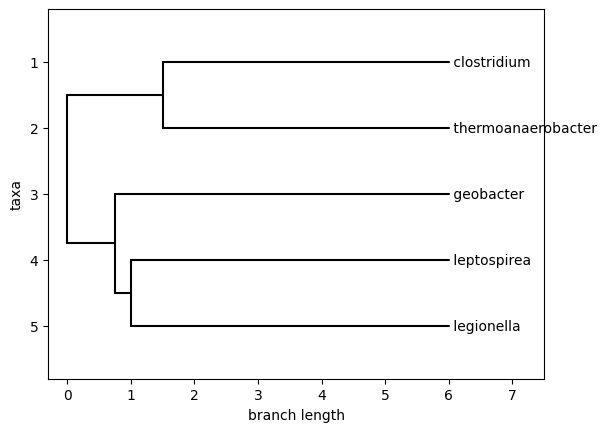

In [13]:
from Bio import Phylo
from Bio import SeqIO
import io
from google.colab import drive

cladeTimes = {}

drive.mount('/content/drive')

# the first two functions are new ones that we've provided;
# be sure to check their docstrings!
def HammingDistance(string1, string2):
  ''' returns the number of different bases in two sequences '''
  counter = 0
  for i in range(len(string1)):
    if string1[i] != string2[i]:
      counter += 1
  return counter

def createDistancesDictionary(recordDict):
  ''' creates a dictionary of distances from a dictionary of records
  (from a file) '''
  distanceDict = {}
  for record1 in recordDict:
    for record2 in recordDict:
      distanceDict[(recordDict[record1].id, recordDict[record2].id)] = HammingDistance(string1 = str(recordDict[record1].seq), string2 = str(recordDict[record2].seq))
  return distanceDict

def leaves(tree):
  ''' Takes a tree in newick format as input and returns the number of leaves
      in that tree. '''
  if type(tree) == str:
    return 1
  else:
    return leaves(tree[0]) + leaves(tree[1])

# Paste your findClosestPair, updateDist, and generateTree functions here;
# be sure to include the generateTree function that includes the cladeTimes line

def makeTimedTree(tree):
  ''' This function takes a phylogenetic tree as input and uses the cladeTimes
      dictionary to reconstruct the branch lengths, returning a timed
      Newick tree. '''
  if type(tree) == str: return tree
  else:
    clade1, clade2 = tree
    timeTree = cladeTimes[tree]
    if clade1 in cladeTimes: timeClade1 = cladeTimes[clade1]
    else: timeClade1 = 0
    if clade2 in cladeTimes: timeClade2 = cladeTimes[clade2]
    else: timeClade2 = 0
    output = "(" + makeTimedTree(clade1) + ":" + str(timeTree-timeClade1) + "," \
                 + makeTimedTree(clade2) + ":" + str(timeTree-timeClade2) + ")"
    return output

# This function is provided and runs your program and displays the resulting tree.
def main():
  # The name of the file from which we're going to read the fast sequence data...
  fileName = "/content/drive/My Drive/SCI10/Week9/bacteriaAminoSeq.fna"

  # Reading the fasta sequence data from a file into a dictionary...
  recordDict = SeqIO.to_dict(SeqIO.parse(fileName, "fasta"))

  # Extracting the names of the sequences from the file...
  clades = [recordDict[record].id for record in recordDict]

  # Computing the distances between all pairs...
  distanceDict = createDistancesDictionary(recordDict = recordDict)

  # Print out the names and sequences
  for record in recordDict:
    print(recordDict[record].id.ljust(20),": ", str(recordDict[record].seq))

  # Now, it's business as usual!
  tree = generateTree(clades = clades, distanceDict = distanceDict)
  if type(tree) is list:
    print("Oops! Here's what got returned by generateTree: ", tree)
  else:
    timedTree = makeTimedTree(tree)
    Phylo.draw(Phylo.read(io.StringIO(str(timedTree)), "newick"))

main()

**Part 10**

Take a look at the phylogenetic tree above that was inferred for these five bacteria. Some are aerobic (use oxygen in the production of energy) and others are anaerobic (don't use oxygen in the production of energy). Early bacteria, which are estimated to have evolved around 3.8 billion years ago, were anaerobic because the atmosphere didn't contain oxygen at that time. Do a quick web search on each of the bacterial taxa in this tree to learn which are aerobic and which are anaerobic. Then, based on what you learned and the tree that you inferred, explain on which branch of the tree (which corresponds to an ancient ancestral bacterial lineage) bacteria evolved the ability to use oxygen in energy production.

<font color="Red">**The branch connecting the MRCA of leptospirea and legionella evolved the ability to use oxygen in energy production because all of the other bacteria which split off earlier are anaerobic.**</font>

### Sequence alignment optional bonus

In class, we talked about the problem of aligning sequences. If you'd like to explore the algorithm for doing this, consider [Recursion Excursion 3](https://colab.research.google.com/drive/1JQC_zkVAIO2HQTRlfYA2KK4DrrZG8dP6?usp=drive_link). (It's based on skills developed in the previous two Recursion Excursions earlier this semester.)



## Congratulations! Time to Submit!

Congratulations! You've implemented a very useful algorithm that allows us to infer evolutionary histories of taxa.


Please submit your notebook on Canvas.